In [69]:
import torch
import torch.nn as nn
import pandas
import random
import matplotlib.pyplot as plt

In [6]:
def generate_real():
    real_data = torch.FloatTensor(
    [random.uniform(0.8, 1.0),
    random.uniform(0.0, 0.2),
    random.uniform(0.8, 1.0),
    random.uniform(0.0, 0.2)])

    return real_data

print("real data:", generate_real())

real data: tensor([0.9355, 0.1270, 0.8713, 0.1204])


In [13]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass
        
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass



In [14]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

print("totally real data:", generate_random(4))

totally real data: tensor([0.1418, 0.2604, 0.9594, 0.2468])


Test descriminator

In [16]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass


counter =  10000
counter =  20000


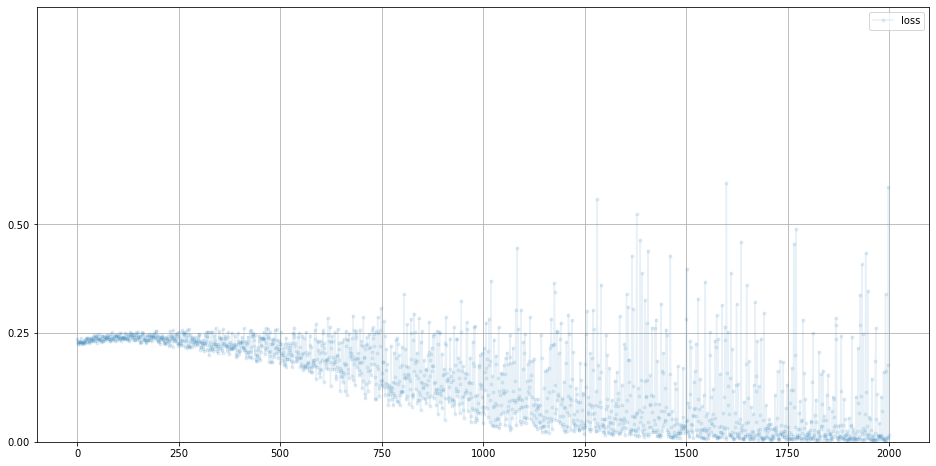

In [17]:
D.plot_progress()

In [59]:
print("Real data source:", D.forward(generate_real()).item())
print("Random noise:", D.forward(generate_random(4)).item())

Real data source: 0.7782878875732422
Random noise: 0.06129203364253044


In [66]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),

            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # no loss function for Generator
        # we only use loss fuction applied ot the outputs of discriminator
        # self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)

        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

In [62]:
G = Generator()

print("Output of untrained generator:", G.forward(torch.FloatTensor([0.5])))


Output of untrained generator: tensor([0.3383, 0.5733, 0.4810, 0.7015], grad_fn=<SigmoidBackward0>)


In [67]:
# create Discriminator and Generator

D = Discriminator()
G = Generator()

# train Discriminator and Generator

for i in range(10000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

    pass

counter =  10000
counter =  20000


Text(0.5, 0, 'Discriminator loss chart')

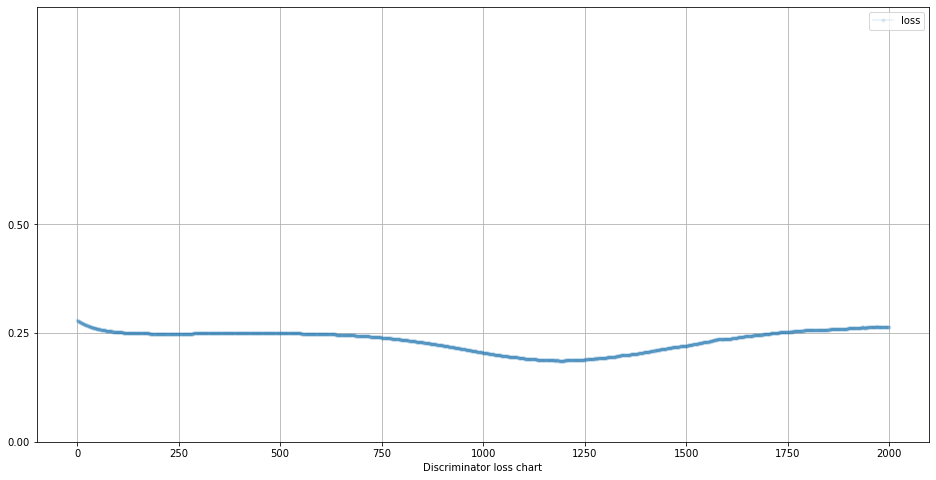

In [71]:
D.plot_progress()
plt.xlabel('Discriminator loss chart')

Text(0.5, 0, 'Generator loss chart')

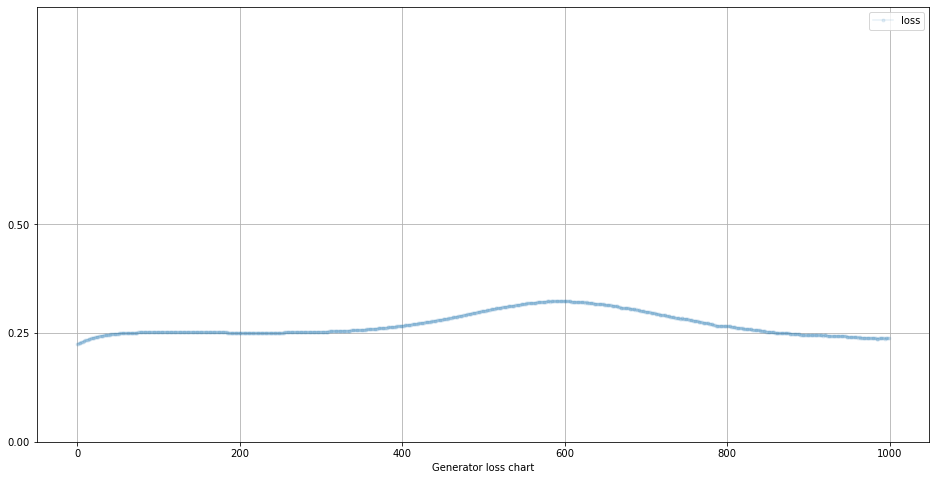

In [72]:
G.plot_progress()
plt.xlabel('Generator loss chart')

In [77]:
print("Output of trained generator:", G.forward(torch.FloatTensor([0.5])))

Output of trained generator: tensor([0.8833, 0.0488, 0.9020, 0.0569], grad_fn=<SigmoidBackward0>)
